# Heart Disease Classification Project

In this project, we'll solve a `binary classification` project using Machine Learning libraries in project named `heart disease classification`. Based on the feature attributs in the data, we'll predict whether or not patient has a heart disease.

The data has been taken from Kaggle [here](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/). As the data source refers, the original data contained 76 attributes. But all published experiments refer to using a subset of `14` of them. The original data is hosted on [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository. Following is the data card of our data:

Data set attributes
1. age in years
2. sex (1 == male, 0 == female)
3. cp (chest pain type, 4 types: val1 typical anginal ; val2 atypical anigma;
      val3 non anigmal pain ; val 4 asymptomatic)
4. trestbps: resting bp
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    val 0 = normal
    val 1 = ST-T wave abnormality
    val 2 = howing probable or definite left ventricular hypertrophy
8.  thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
     Value 1 = upsloping
     Value 2 = flat
     Value 3 = downsloping
12. ca : number of major vessels (0-3)
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target:  (val 0 = < 50% ; val 1 =  > 50%)


## Importing libraries required in project

In [1]:
# Data analysis ibraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [3]:
# Regression models of scikit-learn
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Data Loading and Cleaning

**Reading Csv File**

In [4]:
data_file = pd.read_csv(filepath_or_buffer="../Data/heart.csv")
data_file.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


It would be great to have some EDA on the dataset. Let's describe the attributes of chosen dataset using the statistical methods showing the statistical information and feature details.

In [5]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Observation: from the dataframe info, attained following insights;
There are 14 columns, 13 independant features and 1 dependant variable labelled as 'target.' They are indexed from 0_13
Total no of entries or rows is 1025 which is indexed from 0_1024.
All features are of data type "integer" except the variable "oldpeak" which is a "float" feature. It is a numeric data set hence no hot-encoding is required.

In [6]:
data_file.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


These are the statstics of the data frame imported.

In [7]:
data_file.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Cleaning Data

**Handling duplicate values**

In [8]:
# Check the total number of records and the duplicated records in the dataset
print("no of feature values:", data_file.shape)
print("no of duplicated values: ", data_file.duplicated().sum())

no of feature values: (1025, 14)
no of duplicated values:  723


In [9]:
# Are there any null values in the dataset?
data_file.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Drop the duplicate values 
data_file.drop_duplicates(inplace = True)

In [11]:
print("data shape after cleaning: " , data_file.shape)

data shape after cleaning:  (302, 14)


No of rows reduced from 1025 to 302 after performing cleaning of data.

**Handling missing value**


In [12]:
print(data_file.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Observation: No null values found in the data set after cleaning.

In [13]:
data_file.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observation: 

This is a cleaned version of data set. If we describe the age of data, the minimum age of patient is 29 and Max age of patient is 77. Average age is 54.
trestbp(resting bp): average bp = 131.6, min bp = 94, max bp = 200
fbs: average fbs is 0.14 which suggest most patients have fbs < 120 mg/dl (do not have diabetes.)

In [14]:
feature_names = data_file.drop(columns = 'target', axis=1)
feature_names

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


## **Part 1: Data Collection, Preprocessing and EDA**

What are the ages range of patients? What percentage of patients have a heart disease in the age less than 45? Let's have a look at it.

In [15]:
heart_disease_in_age_less_than_45 = data_file[(data_file['age'] < 45) & (data_file['target'] == 1)]
percentage = (len(heart_disease_in_age_less_than_45) / len(data_file['age'] < 45)) * 100
print(f"Percentage of patients with heart disease in age less than 45: {percentage}%")

Percentage of patients with heart disease in age less than 45: 13.57615894039735%


Observation: From this data it is observed that the percentage of young patients with age less than 45 who were diagnosed with a heart disease is 13.58%

Which type of chest pain is reported by the patients which have normal thalassemia value? Is it all asymptomatic?


In [16]:
filtered_df = data_file[(data_file['thal'] == 3) & (data_file['cp'] == 4)]
cp_asymp = (filtered_df['cp'] == 4).all()

if cp_asymp ==  True:
  print("Yes, all patients with a normal thalassemia value have reported asymptomatic chest pain")
else:
  print("No, patients with normal thalassemia value have reported different chest pains")

Yes, all patients with a normal thalassemia value have reported asymptomatic chest pain


Observation: In the given data set all patients who have a normal thalassemia value of 3 have reported only about asymptomatic chest pain.

What about having a look at average cholesterol values for both the males and females, which have diabetes, and which do not have diabetes

In [17]:
#4. avg chol for both males and females/ fbs
avg_chol = data_file['chol'].mean()
print("Average cholestrol (both males and females): ", avg_chol)

avg_chol_m = data_file[(data_file['sex'] == 1)]['chol'].mean()
print("\nAverage cholestrol for males: " , round(avg_chol_m, 2))

avg_chol_f = data_file[(data_file['sex'] == 0)]['chol'].mean()
print("Average cholestrol for females: " , round(avg_chol_f, 2))

avg_chol_m_diab = data_file[(data_file['sex'] == 1) & (data_file['fbs'] == 1)]['chol'].mean()
print("\nAverage cholestrol for males with diabeties: " , round(avg_chol_m_diab, 2))

avg_chol_f_diab = data_file[(data_file['sex'] == 0) & (data_file['fbs'] == 1)]['chol'].mean()
print("Average cholestrol for femmales with diabeties: " , round(avg_chol_f_diab, 2))

avg_chol_m_no_diab = data_file[(data_file['sex'] == 1) & (data_file['fbs'] == 0)]['chol'].mean()
print("\nAverage cholestrol for males with no diabeties: " , round(avg_chol_m_no_diab, 2))

avg_chol_f_no_diab = data_file[(data_file['sex'] == 0) & (data_file['fbs'] == 0)]['chol'].mean()
print("Average cholestrol for females with no diabeties: " , round(avg_chol_f_no_diab, 2))

Average cholestrol (both males and females):  246.5

Average cholestrol for males:  239.6
Average cholestrol for females:  261.3

Average cholestrol for males with diabeties:  234.12
Average cholestrol for femmales with diabeties:  285.83

Average cholestrol for males with no diabeties:  240.65
Average cholestrol for females with no diabeties:  257.8


Observation: Female patients tend to have a higher cholestrol level and fluctiation in cholestrol levels rather than male patients

To make it further, sort the dataset from older to younger patient and display it.

In [18]:
#5. sorting data with age older ==> younger
df_sorted = data_file.sort_values( by = 'age', ascending = False)
df_sorted

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
313,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
269,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
287,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


Lets show the maximum heart rate in ascending order of the females which have heart-disease.

In [19]:
#6. thlach / sex == 0 / target == 1
max_f_heart_rate = data_file[(data_file['sex'] == 0) & (data_file['target'] == 1)]['thalach'].max()
print("Max heart rate of a female with heart disease: ", max_f_heart_rate )

Max heart rate of a female with heart disease:  192


Calculate the person’s average resting blood pressure against each resting electrocardiographic result group in ascending order.

In [20]:
#7. avg trestbp for each of the three restecg groups
avg_trestbps = data_file.groupby('restecg')['trestbps'].mean()
avg_trestbps = avg_trestbps.to_frame().sort_values( by = 'trestbps', ascending = True)
avg_trestbps

,trestbps
restecg,
1,129.006623
0,134.027211
2,140.500000


Observation: Restecg has three values, for val 0 (normal) the average blood pressure is 134.03,
for val 1 (ST-T wave abnormality) the average blood pressure is 129.01
for val 2 (howing probable or definite left ventricular hypertrophy) the average blood pressure is 140.5

It would be great to find the impact of no of vessels on occurence of heart disease in patients, which has more percentage of heart disease

In [21]:
for num_vessel in range(4):
  patients_with_num_vessels = data_file[data_file['ca'] == num_vessel]
  per_with_heart_disease = (patients_with_num_vessels['target'] == 1).mean()
  per_with_heart_disease = per_with_heart_disease * 100
  print(f"Percentage of patients with {num_vessel} major vessels and heart disease: " , round(per_with_heart_disease, 2) , "%")

Percentage of patients with 0 major vessels and heart disease:  74.29 %
Percentage of patients with 1 major vessels and heart disease:  32.31 %
Percentage of patients with 2 major vessels and heart disease:  18.42 %
Percentage of patients with 3 major vessels and heart disease:  15.0 %


Observation: We can observe from this result that patienst witha greater no of major vessels have a less chance of suffering from heart diseases.

Average resting blood pressure of patients with heart disease against each thalassema and chest pain type

In [22]:
heart_disease_df = data_file[(data_file['target'] == 1)]
cp_data = heart_disease_df.groupby(['cp'])
avg_trestbps_cp_thal = cp_data['trestbps'].mean()
print("Average bps categorized with chest pain categories" , avg_trestbps_cp_thal)

Average bps categorized with chest pain categories cp
0    127.564103
1    126.195122
2    129.029412
3    142.125000
Name: trestbps, dtype: float64


Maximum blood pressure in males with no heart disease and maximum blood pressure in males with a heart disease.

In [23]:
max_bp_with_heart_disease = data_file[(data_file['sex'] == 1) & (data_file['target'] == 1)]['trestbps'].max()
max_bp_with_no_heart_disease = data_file[(data_file['sex'] == 1) & (data_file['target'] == 0)]['trestbps'].max()
print(f"Max bps in males with heart disease: {max_bp_with_heart_disease}")
print(f"Max bps in males with no heart disease: {max_bp_with_no_heart_disease}")


Max bps in males with heart disease: 178
Max bps in males with no heart disease: 192


### Visualization of data

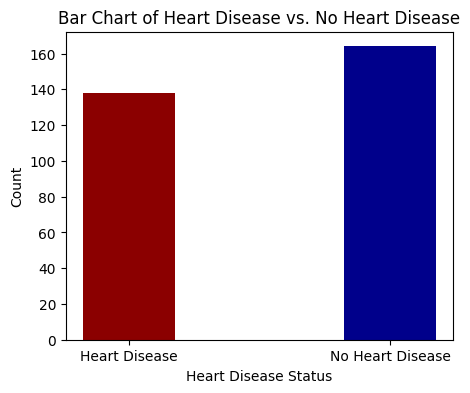

In [24]:
target_counts = data_file['target'].value_counts()
plt.figure(figsize=(5, 4))
width = 0.35
plt.bar(target_counts.index, target_counts.values, width, color=['DarkBlue', '#8B0000'])
plt.xticks(target_counts.index, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.title('Bar Chart of Heart Disease vs. No Heart Disease')
plt.show()

x:  range(0, 2)


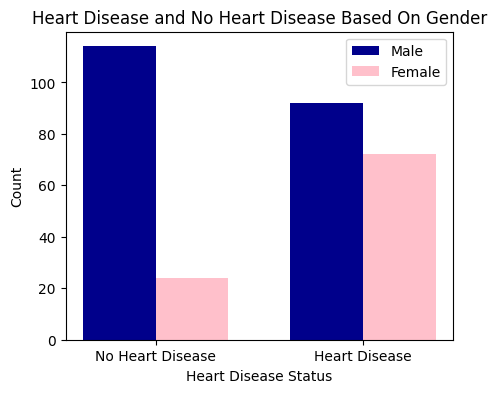

In [25]:
grouped = data_file.groupby(['target', 'sex']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(5, 4))
width = 0.35
x = range(len(grouped))
print("x: ", x)

bars_male = ax.bar(x, grouped[1], width, label='Male', color='darkblue')
bars_female = ax.bar([i + width for i in x], grouped[0], width, label='Female', color='pink')

ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
ax.set_xlabel('Heart Disease Status')
ax.set_ylabel('Count')
ax.set_title('Heart Disease and No Heart Disease Based On Gender')
ax.legend();

Observation: In the given dataset females have a higher rate of having heart disease than males

pie chart of reported chest pains:

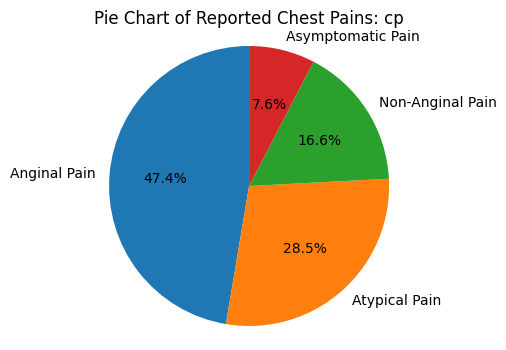

In [26]:
chest_pains = data_file['cp'].value_counts()
plt.figure(figsize=[5, 4])
plt.pie(chest_pains, labels = ['Anginal Pain', 'Atypical Pain', 'Non-Anginal Pain', 'Asymptomatic Pain'], autopct = '%1.1f%%', startangle=90)
plt.title('Pie Chart of Reported Chest Pains: cp')
plt.axis('equal')
plt.show()

Observation: 47% people have reported Anginal Pain, 28% people have reported Atypical Pains, 16% of people have reported Non-Anginal Pain, and the least percentage of reported pain is Asympotmatic Pain with 7%

Scatter Plot of Target values[0,1] against age and cholestrol

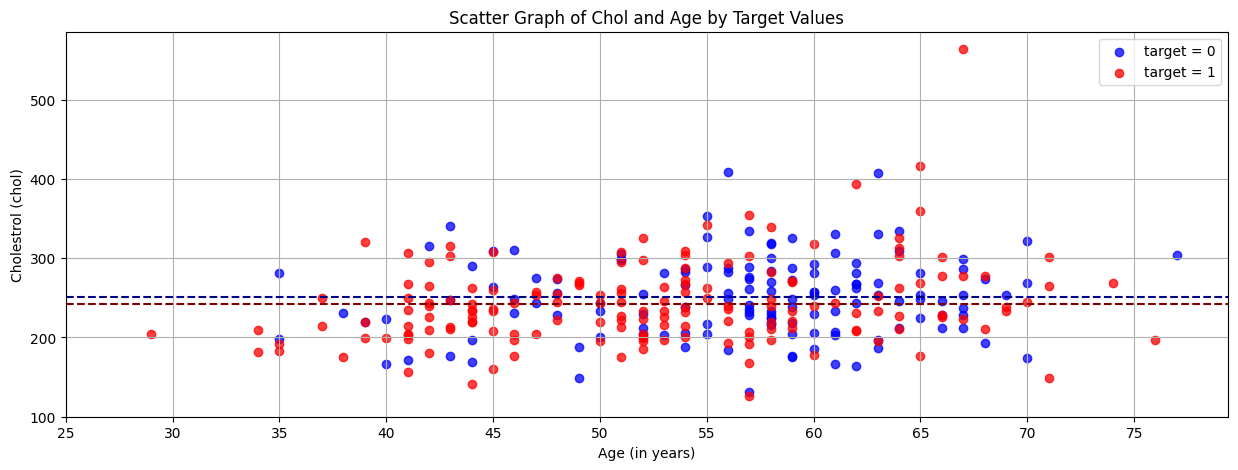

In [27]:
t_0 = data_file[data_file['target'] == 0]
t_1 = data_file[data_file['target'] == 1]

plt.figure(figsize= [15,5])
plt.scatter(t_0['age'], t_0['chol'], label= "target = 0", color ='blue', marker = 'o',  alpha=0.75 )
plt.scatter(t_1['age'], t_1['chol'], label= "target = 1", color ='red', marker = 'o',  alpha=0.75 )
plt.axhline(y=np.nanmean(t_0['chol'] ), color = 'darkblue' , linestyle = "--")
plt.axhline(y=np.nanmean(t_1['chol'] ), color = 'maroon' , linestyle = "--")

plt.xticks(np.arange(25, 80, step = 5))
plt.yticks(np.arange(100, 600, step = 100))
plt.grid()

plt.title('Scatter Graph of Chol and Age by Target Values')
plt.xlabel('Age (in years)')
plt.ylabel('Cholestrol (chol)')
plt.legend()

plt.show()

Observation: In the given data set average cholestrol lies between 200 and 300

1. What does the distribution of serum blood sugar levels (fasting blood sugar) look like among heart disease patients? Is a histogram the right choice for this variable?
2. What does the distribution of resting blood pressure (trestbps) look like? Is it normally distributed or skewed? Consider a histogram.
3. Does cholesterol level (chol) correlate with the presence of heart disease? Can we visualize this correlation using a scatterplot?
4. Can we create a correlation matrix heatmap to visualize the overall relationships between different variables in our heart disease dataset?
5. What is the distribution of cholesterol levels (chol) among individuals with different chest pain types (cp)?

distribution of fbs when target == 1

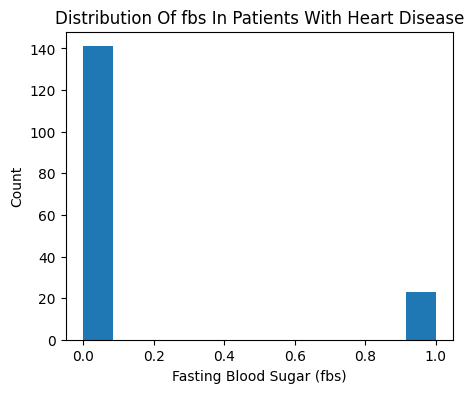

In [28]:
heart_disease_fbs = data_file[(data_file['target'] == 1)]['fbs']
plt.figure(figsize = (5,4))
plt.hist(heart_disease_fbs, bins=12 )

plt.title("Distribution Of fbs In Patients With Heart Disease")
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Count')

plt.show();

Observation: The histogram is not a suitable choice to show distribution of blood sugar levels as fbs does not have continous values. We will plot a bar chart instead.

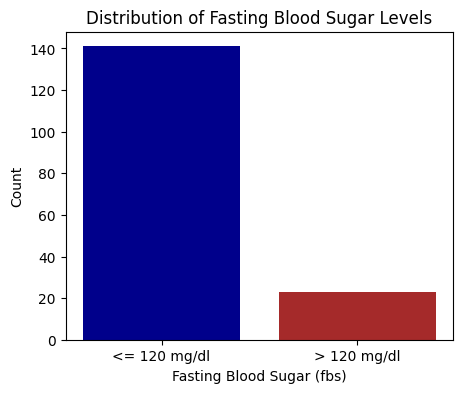

In [29]:
fbs_counts = data_file[(data_file['target'] == 1)]['fbs'].value_counts()

plt.figure(figsize=(5, 4))
plt.bar(fbs_counts.index, fbs_counts.values, color=['darkblue', 'brown'])
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar Levels')
plt.xticks(fbs_counts.index, ['<= 120 mg/dl', '> 120 mg/dl'])
plt.show()

Observation: The presence of diabetes does not consistently coincide with the presence of a heart disease, as observed in the bar chart above, patients with diabities will not necessarily have heart disease.

2. What does the distribution of resting blood pressure (trestbps) look like? Is it normally distributed or skewed? Consider a histogram.

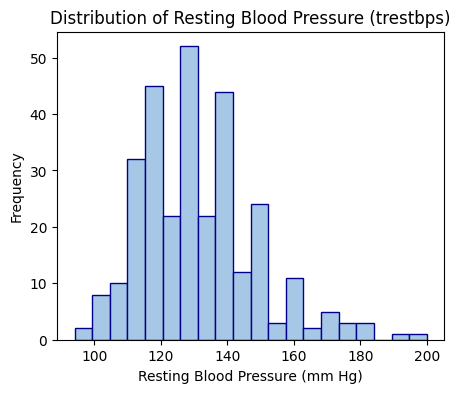

In [30]:
rest_bp = data_file['trestbps']

plt.figure(figsize=(5, 4))
plt.hist(rest_bp, bins=20, color='#A7C7E7', edgecolor = 'darkblue')

plt.title('Distribution of Resting Blood Pressure (trestbps)')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')

plt.show()

Does cholesterol level (chol) correlate with the presence of heart disease? Can we visualize this correlation using a scatterplot?

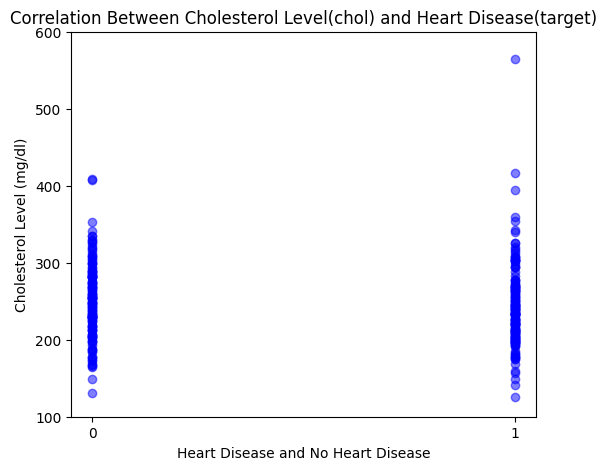

In [31]:
chol = data_file['chol']
heart_disease = data_file['target']

plt.figure(figsize=(6, 5))
plt.scatter( heart_disease, chol, color='blue', alpha=0.5)

plt.title('Correlation Between Cholesterol Level(chol) and Heart Disease(target)')
plt.xlabel('Heart Disease and No Heart Disease')
plt.ylabel('Cholesterol Level (mg/dl)')

plt.xticks(np.arange(0, 1.1, step = 1))
plt.yticks(np.arange(100, 700, step = 100))

plt.show()

Observation: The cholesterol levels show a consistent range across both heart disease patients and non-heart disease patients

Can we create a correlation matrix heatmap to visualize the overall relationships between different variables in our heart disease dataset?

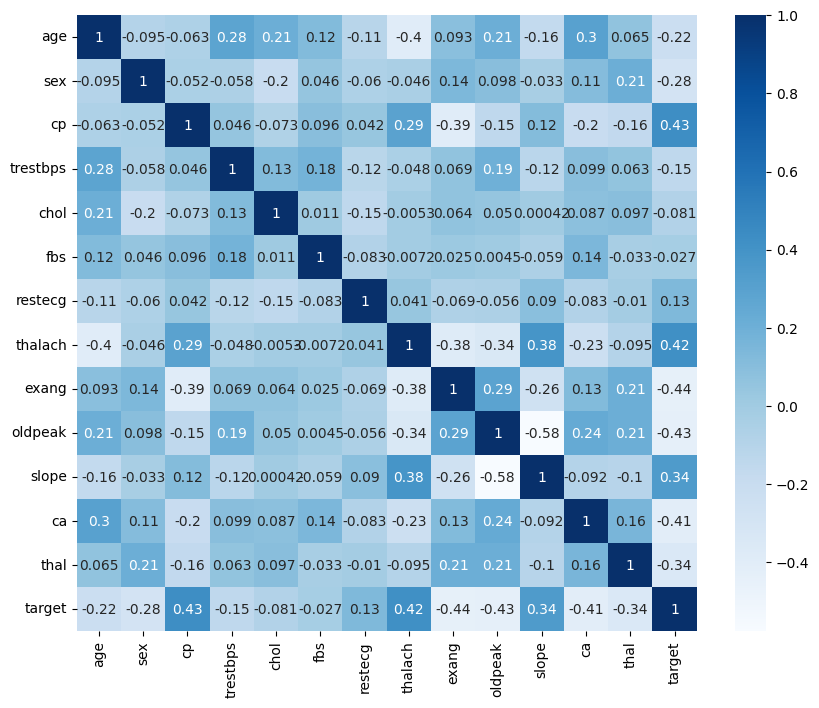

In [32]:
plt.figure(figsize=(10,8))
cor = data_file.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

## Preparing Data for Machine Learning

Split the data into dependent and independent variables to have a training on it.

In [33]:
X = data_file.drop(columns='target', axis=1)
y = data_file['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Splitting Data into train and test sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### Scaling dataset (Data Transformation)

In [35]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_train)

## **Part 2: Supervised Learning (Regression and Classification)**

### 1. Regression Algorithms

#### Support Vector Regressor

In [36]:
SVR_model = SVR(kernel='sigmoid',
                C=1.0,
                epsilon=0.2)

SVR_model.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='sigmoid')

In [37]:
# Making predictions with SVR
svr_predictions = SVR_model.predict(X_test)

In [38]:
svr_predictions[:10]

array([-0.13379126,  0.68224728,  0.86802188, -0.93500228,  1.11488692,
        0.14928675,  0.49361138,  0.29057379,  0.20868316,  0.29509814])

Let's get the accuracy of SVR model

In [39]:
# setting a threshold
threshold = 0.5
svr_predictions_binary = (svr_predictions >= threshold).astype(int)

accuracy = accuracy_score(y_test, svr_predictions_binary)
print(f"Accuracy with threshold : {round(accuracy,2) * 100}%")

Accuracy with threshold : 54.0%


In [40]:
df_predictions = pd.DataFrame({'Actual': y_test, 'SVR_Predictions': svr_predictions_binary})
df_predictions.head()

,Actual,SVR_Predictions
342,1,0
191,1,1
349,0,1
288,1,0
56,1,1


#### Random Forest Regressor (RFR)

In [41]:
RFR_model = RandomForestRegressor(n_estimators=300,
                                  max_depth=10,
                                  criterion="squared_error",
                                  random_state=0)

RFR_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=0)

In [42]:
RFR_predictions = RFR_model.predict(X_test)

In [43]:
threshold = 0.5
RFR_predictions_binary = (RFR_predictions >= threshold).astype(int)

RFR_accuracy = accuracy_score(y_test, RFR_predictions_binary)
print(f"RFR accuracy with threshold : {round(RFR_accuracy,2) * 100}%")

RFR accuracy with threshold : 84.0%


In [44]:
df_RFR_predictions = pd.DataFrame({'Actual': y_test, 'RFR_Predictions': RFR_predictions_binary})
df_RFR_predictions.head()

,Actual,RFR_Predictions
342,1,1
191,1,1
349,0,0
288,1,1
56,1,0


#### Regression Models Evaluations

##### **SVR**

In [45]:
# SVR evaluation
SVR_MAE = mean_absolute_error(y_true=y_test, y_pred=svr_predictions)
SVR_MSE = mean_squared_error(y_true=y_test, y_pred=svr_predictions)
SVR_RMSE = np.sqrt(SVR_MSE)

In [46]:
print("Support Vector Regressor Evaluation\n")

print("Mean Absolute Error: ", SVR_MAE)
print("Mean Squared Error: ", SVR_MSE)
print("Root Mean Squared Error: ", SVR_RMSE)

Support Vector Regressor Evaluation

Mean Absolute Error:  0.6682671017249734
Mean Squared Error:  0.7255758611025223
Root Mean Squared Error:  0.8518074084571713


##### **RFR**

In [47]:
# RFR evaluation

RFR_MAE = mean_absolute_error(y_test, RFR_predictions)
RFR_MSE = mean_squared_error(y_test, RFR_predictions)
RFR_RMSE = np.sqrt(RFR_MSE)

In [48]:
print("Random Forest Regressor Evaluation\n")

print("Mean Absolute Error : ", RFR_MAE)
print("Mean Squared Error : ", RFR_MSE)
print("Root Mean Squared Error : ", RFR_RMSE)

Random Forest Regressor Evaluation

Mean Absolute Error :  0.29366120218579234
Mean Squared Error :  0.13846193078324226
Root Mean Squared Error :  0.37210473093370133


##### **Visualizing Errors**

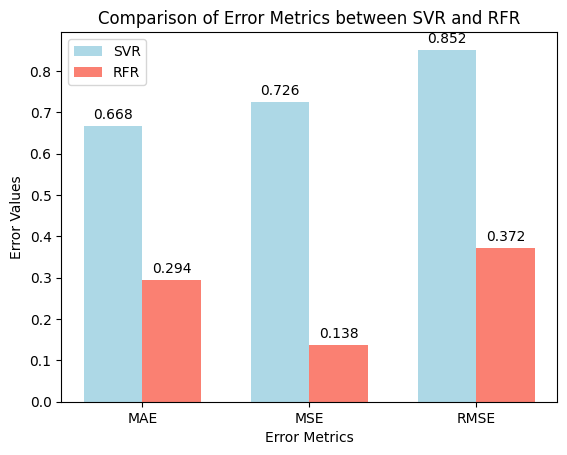

In [49]:
# visulaizing errors

svr_values = [SVR_MAE, SVR_MSE, SVR_RMSE]
rfr_values = [RFR_MAE, RFR_MSE, RFR_RMSE]

positions = np.arange(len(svr_values))
width = 0.35

fig, ax = plt.subplots()

svr_bars = ax.bar(positions - width/2, svr_values, width, label='SVR', color='lightblue')
rfr_bars = ax.bar(positions + width/2, rfr_values, width, label='RFR', color='salmon')

ax.set_xticks(positions)
ax.set_xticklabels(['MAE', 'MSE', 'RMSE'])
ax.set_xlabel('Error Metrics')
ax.set_ylabel('Error Values')
ax.set_title('Comparison of Error Metrics between SVR and RFR')

for bars in [svr_bars, rfr_bars]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

ax.legend();

### Classification Algorithms

#### 1. Logistic Regression Classifier (LGR)

In [36]:
# Creeating Logistic regression model with good (popular) parameters 
lgr_model = LogisticRegression(
    solver = 'liblinear', 
    random_state = 0, 
    max_iter = 300
)
lgr_model.fit(X_train, y_train)

LogisticRegression(max_iter=300, random_state=0, solver='liblinear')

Making predictions with LogisticRegression and test data

In [37]:
# model predictions
y_pred = lgr_model.predict(X_test)

In [38]:
print("Predicted value: " , y_pred[4])
print("Actual True value for: " , y_test.iloc[4])

Predicted value:  1
Actual True value for:  1


Observation: The model correctly predicted a tagret value of 1 for x_test[4]

In [39]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
342,65,0,2,155,269,0,1,148,0,0.8,2,0,2
191,56,1,1,130,221,0,0,163,0,0.0,2,0,3
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3
288,58,0,2,120,340,0,1,172,0,0.0,2,0,2
56,56,1,3,120,193,0,0,162,0,1.9,1,0,3


Accuracy of Logistic Regression Model

In [40]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {(acc)*100:.2f}%")

Accuracy of Logistic Regression classifier: 85.25%


Observation: Accuracy of the model prediction is 85.25%

LinearRegression Confusion Matrix  (test)

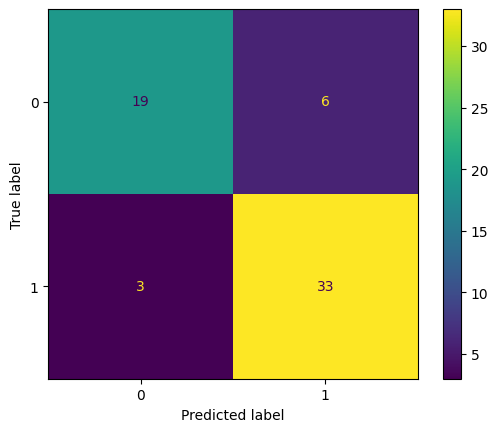

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=lgr_model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgr_model.classes_)

cmd.plot();

#### 2. Random Forest Classifier (RFC)

In [42]:
rfc_model = RandomForestClassifier(criterion = 'gini', 
                                   n_estimators = 300, 
                                   max_depth=7, 
                                   ccp_alpha=0.0, 
                                   bootstrap=True)

rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300)

In [43]:
y_pred_rfc = rfc_model.predict(X_test)

Accuracy of Random Forest Model

In [50]:
acc_rfc = rfc_model.score(X_test, y_test)
print(f"Accuracy of Random Forest Classifier model: {(acc_rfc*100):.2f}%")

Accuracy of Random Forest Classifier model: 83.61%


Observation: Accuracy of RFC is lower than LGR. Different ways like finding the best parameters and best model through the approaches like `RandomSearchCV` or `GridSearchCV` may help improving the performance of the model

##### **Applying RandomSearchCV to find best params and model for RFC**

In [45]:
rfc_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [46]:
randomsearch_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                n_iter=20,
                                cv=5,
                                param_distributions=rfc_grid,
                                verbose=True)

randomsearch_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
randomsearch_rfc.best_params_

{'n_estimators': 410,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [57]:
print(f"Accuracy of Random Forest CLassifier with RandomizedSearchCV: {(randomsearch_rfc.score(X_test, y_test)*100):.2f}%")

Accuracy of Random Forest CLassifier with RandomizedSearchCV: 81.97%


In [58]:
print("Predicted value: " , y_pred_rfc[0] )
print("Actual True value for: " ,y_test.iloc[0])

Predicted value:  1
Actual True value for:  1


Confusion Matrix for RFC

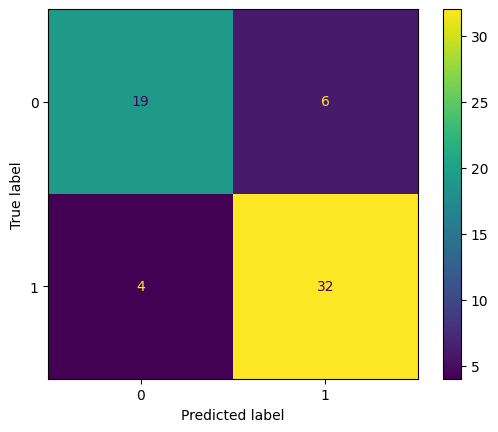

In [59]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc, labels=rfc_model.classes_)
cmd_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc_model.classes_)

cmd_rfc.plot();

#### 3. Support Vector Machine (SVM) Classifier

In [60]:
svm_model = SVC(kernel = 'linear', gamma = 'auto')
svm_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

Predicting Values for test data with SVM model

In [61]:
y_pred_svm = svm_model.predict(X_test)

In [62]:
print("Predicted value: ", y_pred_svm[9])
print("Actual True value for: ", y_test.iloc[9])

Predicted value:  0
Actual True value for:  0


Accuracy of Support Vector Machines

In [63]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of Support Vector Machine: {(acc_svm)*100:.2f}%")

Accuracy of Support Vector Machine: 83.61%


Observation: Accuracy of SVM is 83.61% (kernel = 'linear')

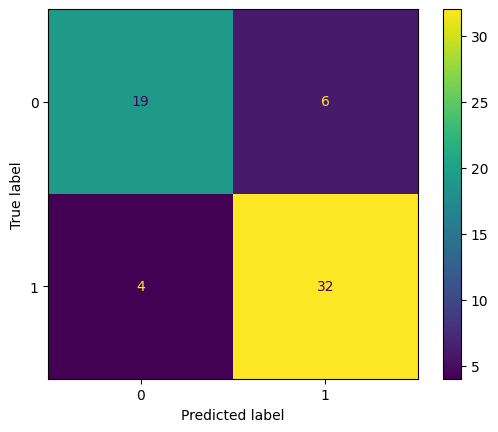

In [64]:
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
cmd_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
cmd_svm.plot();

#### 4. XGBoost Classifier

This time, let's try implementing the concept of GridSearchCV to find the best parameters for the data.

In [65]:
xgb_model = XGBClassifier(random_state = 42)

p_grid = {
    'n_estimators': [100, 150, 200],            # no of dt to make during training
    'learning_rate': [0.01, 0.1, 0.2],          # step size at each iteration
    'max_depth': [3, 5, 7],                     # max depth of each tree
    'min_child_weight': [1, 2, 3],              # min sum of instance weight (hessian) ??**
    'subsample': [0.8, 0.9, 1.0],               # to prevent overfitting(<1)
    'colsample_bytree': [0.8, 0.9, 1.0],        #randomness for columns
}

# Applying cross validation on grid search to fine-tune the model's parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=p_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [66]:
best_params_xgb = grid_search.best_params_
best_xgb_model = XGBClassifier(random_state=42, **best_params_xgb)
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [67]:
# Finding predictions on xgb model
y_pred_xgb = best_xgb_model.predict(x_test)

In [68]:
# time to find the accuracy of xgboost classifier
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGB model: {(acc_xgb*100):.2f}%")

Accuracy of XGB model: 81.97%


Confusion Matrix for XGB Classifier

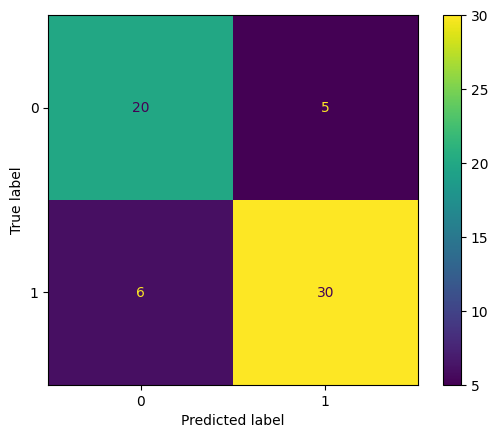

In [69]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cmd_xgb = ConfusionMatrixDisplay(cm_xgb,  display_labels=best_xgb_model.classes_ )

cmd_xgb.plot();

#### Cross-Validation Scores of LGR

In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lgr_model_kf = lgr_model

accuracy_list=[]
prec_list =[]
recall_list =[]
f1_score_list = []

for train_index, test_index in kf.split(X):
    X_train_k, x_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]

    lgr_model_kf.fit(X_train_k, y_train_k)

    y_pred_k = lgr_model_kf.predict(x_test_k)

    accuracy_k = accuracy_score(y_test_k, y_pred_k)
    accuracy_list.append(accuracy_k)

    prec_k = precision_score(y_test_k, y_pred_k, average='weighted')
    prec_list.append(prec_k)

    recall_k = recall_score(y_test_k, y_pred_k, average ='weighted')
    recall_list.append(recall_k)

    f1_score_k = f1_score(y_test_k, y_pred_k)
    f1_score_list.append(f1_score_k)

mean_acc = round(np.mean(accuracy_list), 2)
print("Accuracy of LGR with K-FOLD cross validation: ", mean_acc)

mean_prec = round(np.mean(prec_list), 2)
print("Precision of LGR with K-FOLD cross validation: ", mean_prec)

mean_recall = round(np.mean(recall_list), 2)
print("Recall of LGR with K-FOLD cross validation: ", mean_recall)

mean_f1 = round(np.mean(f1_score_list), 2)
print("F1 score of LGR with K-FOLD cross validation: ", mean_f1)

Accuracy of LGR with K-FOLD cross validation:  0.82
Precision of LGR with K-FOLD cross validation:  0.82
Recall of LGR with K-FOLD cross validation:  0.82
F1 score of LGR with K-FOLD cross validation:  0.84


#### Using `scoring` parameter to get the cross-validated metrics of models

Getting cross-validated accuracy of LGR 

In [71]:
lgr_cv_acc = cross_val_score(lgr_model, X_train, y_train, cv=5, scoring ='accuracy')
lgr_cv_acc

array([0.67346939, 0.83333333, 0.79166667, 0.83333333, 0.89583333])

Getting cross-validated precision of LGR 

In [72]:
lgr_cv_precision = cross_val_score(lgr_model, X_train, y_train, cv=5, scoring='precision')
lgr_cv_precision

array([0.64705882, 0.86956522, 0.8       , 0.82142857, 0.92      ])

Getting cross-validated recall of LGR 

In [73]:
lgr_cv_recall = cross_val_score(lgr_model, X_train, y_train, cv=5, scoring='recall')
lgr_cv_recall

array([0.84615385, 0.8       , 0.8       , 0.88461538, 0.88461538])

Getting cross-validated f1 of LGR 

In [74]:
lgr_cv_f1 = cross_val_score(lgr_model, X_train, y_train, cv=5, scoring='f1')
lgr_cv_f1

array([0.73333333, 0.83333333, 0.8       , 0.85185185, 0.90196078])

Getting the mean to find actual cross-validated evaluation measures of LGR 

In [75]:
print(f'Cross Validation Accuracy: {np.mean(lgr_cv_acc).round(2)}')
print(f'Cross Validation Precision: {np.mean(lgr_cv_precision).round(2)}')
print(f'Cross Validation Recall: {np.mean(lgr_cv_recall).round(2)}')
print(f'Cross Validation f1_score: {np.mean(lgr_cv_f1).round(2)}')

Cross Validation Accuracy: 0.81
Cross Validation Precision: 0.81
Cross Validation Recall: 0.84
Cross Validation f1_score: 0.82


Let's plot them to see visually

In [78]:
names = ['ACC', 'PRECISION', 'RECALL', 'F1']
measures = [np.mean(lgr_cv_acc).round(2), np.mean(lgr_cv_precision).round(2), np.mean(lgr_cv_recall).round(2), np.mean(lgr_cv_f1).round(2)]

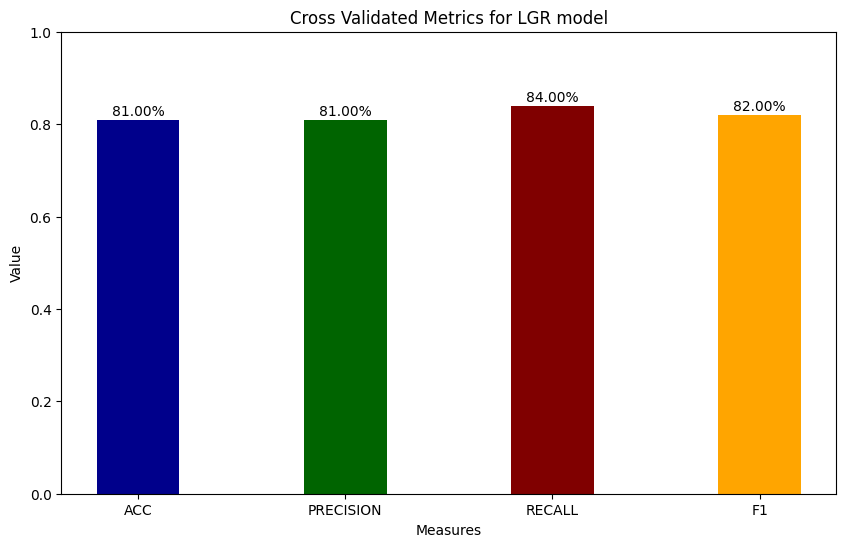

In [80]:
plt.figure(figsize=(10, 6))

width = 0.4
bars = plt.bar(names, measures, width, color=['darkblue', 'darkgreen', 'maroon', 'orange'])

plt.ylim(0, 1)
plt.title('Cross Validated Metrics for LGR model')
plt.xlabel('Measures')
plt.ylabel('Value')

plt.xticks(names)

for i in bars:
    height = i.get_height()
    per = '{:.2%}'.format(height)
    plt.annotate(
        per, 
        xy=(i.get_x() + i.get_width() / 2, height), 
        xytext=(0, 3), 
        textcoords='offset points',
        ha='center'
    )

plt.show();

#### Regular Accuracies Comparison Visually

In [81]:
model_names = ['LGR', 'RFC', 'SVM', 'XGBC']
accuracies = [acc, acc_rfc, acc_svm, acc_xgb]

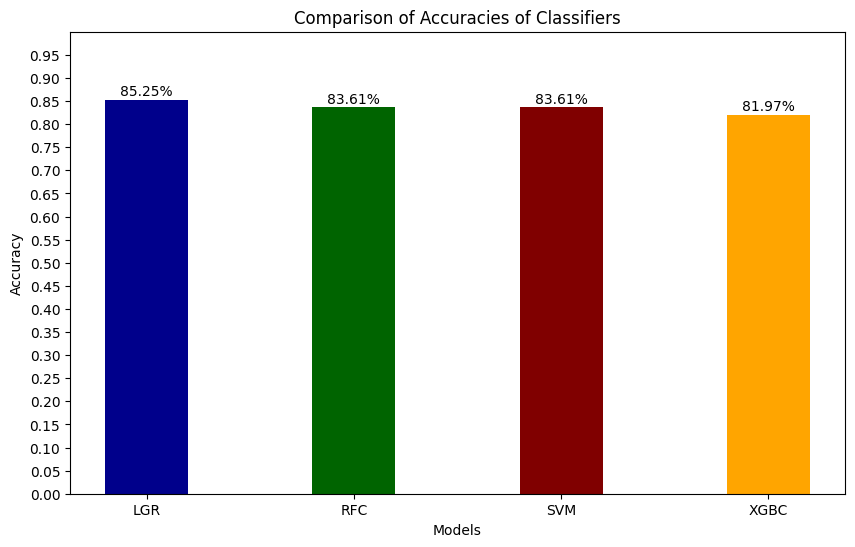

In [82]:
plt.figure(figsize=(10, 6))

width = 0.4
bars = plt.bar(model_names, accuracies, width, color=['darkblue', 'darkgreen', 'maroon', 'orange'])

plt.ylim(0, 1)
plt.title('Comparison of Accuracies of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.xticks(model_names)
plt.yticks(np.arange(0, 1, step=0.05))

#printing percentages in 2 dp
for i in bars:
    height = i.get_height()
    per = '{:.2%}'.format(height)
    plt.annotate(
        per, 
        xy=(i.get_x() + i.get_width() / 2, height), 
        xytext=(0, 3), 
        textcoords='offset points',
        ha='center'
    )

plt.show();

#### Evaluation of the best model (Logistic Regression)

1. Precision (TP/(TP+FP))

Let's first find what is the precision of our best performing model.

In [83]:
#precision
precision_lgr = precision_score(y_test, y_pred, average='weighted')
print("Precision score of LGR model: ", precision_lgr.round(2))

Precision score of LGR model:  0.85


2. Recall (TP/(TP+FN))

Another good metric is the recall. Let's calculate that

In [84]:
recall_lgr = recall_score(y_test, y_pred, average = 'weighted')
print("Recall score of LGR model: ", recall_lgr.round(2))

Recall score of LGR model:  0.85


3. F1 score (2×Precision×Recall)/(Precision+Recall)

F1 score is the mixture of precision and the recall of our model. We can consider the f1-score as the overall average performance of our model.

In [85]:
f1_score_lgr = f1_score(y_test, y_pred)
print("F1 score of LGR model: " , f1_score_lgr.round(2))

F1 score of LGR model:  0.88


4. AUC-ROC Curve (TPR / FPR)

For the classification models, apart from these three legacy measures, we can also evaluate our model using AUC-ROC curve. 

In [86]:
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC score of LGR model: ", auc_roc.round(2))

AUC score of LGR model:  0.84


5. Classification Report

Let's now find the general report of evaluation of our best performing classification model by using classification report. 

In [87]:
cr_lgr = classification_report(y_test, y_pred)
print("Classification Report for LGR model: \n" , cr_lgr)

Classification Report for LGR model: 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



---

#### Decision about best performing Classification model

Based on the experiments, we can see that Logistic Regression classifier outperforms all other models and it performed best. 

#### Saving and Loading Best Performing Classification model

In [88]:
import pickle
pickle.dump(lgr_model, open("./models/ml_model.pkl", "wb"))

Time to record the columns for which we are inputting our model to make prediction

In [89]:
list(X[0:1])

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

What are the values in the first record to predict with loaded model?

In [90]:
list(X[0:1].values)

[array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
          2.,   3.])]

Let's check the shape of data (as we are going to predict the result on it)

In [91]:
X[0:1].shape

(1, 13)

In [92]:
loaded_model = pickle.load(open("./models/ml_model.pkl", "rb"))
print(f"The loaded model's prediction is: {loaded_model.predict(X[0:1])[0]}")

The loaded model's prediction is: 0


---